# Samrat Baral
# MSCS634 - Advanced Big Data and Data Mining
# Lab Assignment: Data Collection, Visualization, and Analysis


# Task
Analyze the 'flights' dataset from Seaborn by visualizing the data, preprocessing it (handling missing values, outlier detection, data reduction, scaling, and discretization), and performing a statistical analysis (general overview, central tendency, dispersion measures, and correlation analysis).

In [16]:
# Load sample dataset (you can replace this with your own CSV)
# Sales dataset from seaborn
# df = sns.load_dataset('tips')

# Load the 'flights' dataset from Seaborn
df = sns.load_dataset('flights')

# Display first 5 rows
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Visualize the data

### Subtask:
Generate visualizations for the 'flights' dataset, similar to the ones created for the 'tips' dataset.


**Reasoning**:
Generate a scatter plot and a histogram to visualize the 'flights' dataset as requested, following the specified instructions for figure size, labels, titles, and KDE for the histogram.



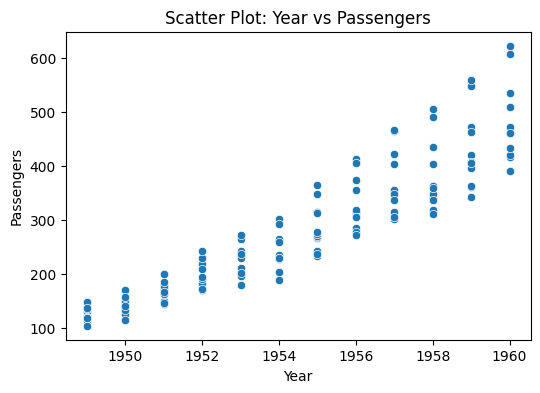

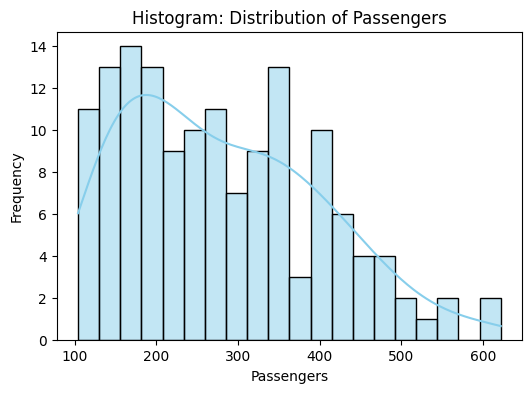

In [17]:
# Scatter Plot: relationship between year and passengers
plt.figure(figsize=(6,4))
sns.scatterplot(x='year', y='passengers', data=df)
plt.title("Scatter Plot: Year vs Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

# Histogram: Distribution of Passengers
plt.figure(figsize=(6,4))
sns.histplot(df['passengers'], bins=20, kde=True, color='skyblue')
plt.title("Histogram: Distribution of Passengers")
plt.xlabel("Passengers")
plt.ylabel("Frequency")
plt.show()

## Preprocess the data

### Subtask:
Apply the same preprocessing steps (handling missing values, outlier detection, data reduction, scaling, and discretization) to the 'flights' dataset.


**Reasoning**:
Apply the preprocessing steps to the 'flights' dataset as instructed, including checking for missing values, detecting and removing outliers, sampling, dropping a column, scaling, and discretizing.



In [18]:
# Check for missing values
print("Missing values before handling:")
display(df.isnull().sum())

# Since there are no missing values in the 'flights' dataset based on the previous run, skip filling missing values.

# IQR Method for detecting outliers in 'passengers'
Q1 = df['passengers'].quantile(0.25)
Q3 = df['passengers'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"\nIQR = {IQR:.2f}, Lower = {lower:.2f}, Upper = {upper:.2f}")

outliers = df[(df['passengers'] < lower) | (df['passengers'] > upper)]
print(f"Outliers detected: {len(outliers)} rows")

# Remove outliers
df_no_outlier = df[(df['passengers'] >= lower) & (df['passengers'] <= upper)].copy() # Added .copy() to avoid SettingWithCopyWarning

# Reduce dataset size by sampling 70% of data
df_sampled = df_no_outlier.sample(frac=0.7, random_state=42).copy() # Added .copy()

# Drop less relevant columns
df_reduced = df_sampled.drop(columns=['month']).copy() # Added .copy()
print("\nData after reduction:")
display(df_reduced.head())

# Data Scaling and Discretization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_reduced['passengers'] = scaler.fit_transform(df_reduced[['passengers']])

# Discretize passengers into categories (Low, Medium, High)
df_reduced['passengers_category'] = pd.cut(df_reduced['passengers'],
                                     bins=[0, 0.33, 0.66, 1.0],
                                     labels=['Low', 'Medium', 'High'])

print("\nData after scaling and discretization:")
display(df_reduced.head())

Missing values before handling:


,0
year,0
month,0
passengers,0



IQR = 180.50, Lower = -90.75, Upper = 631.25
Outliers detected: 0 rows

Data after reduction:


,year,passengers
117,1958,359
19,1950,170
82,1955,237
97,1957,301
56,1953,237



Data after scaling and discretization:


,year,passengers,passengers_category
117,1958,0.507968,Medium
19,1950,0.131474,Low
82,1955,0.264940,Low
97,1957,0.392430,Medium
56,1953,0.264940,Low


## Perform statistical analysis

### Subtask:
Conduct a statistical analysis on the preprocessed 'flights' dataset, including general overview, central tendency, dispersion measures, and correlation analysis.


**Reasoning**:
Get a general overview and descriptive statistics of the reduced dataframe.



In [19]:
df_reduced.info()
df_reduced.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 117 to 54
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   year                 101 non-null    int64   
 1   passengers           101 non-null    float64 
 2   passengers_category  100 non-null    category
dtypes: category(1), float64(1), int64(1)
memory usage: 2.6 KB


,year,passengers
count,101.000000,101.000000
mean,1954.188119,0.327324
std,3.546020,0.232876
min,1949.000000,0.000000
25%,1951.000000,0.131474
50%,1954.000000,0.276892
75%,1958.000000,0.500000
max,1960.000000,1.000000


**Reasoning**:
Calculate and print central tendency measures for the 'passengers' column.



In [20]:
mean_passengers = df_reduced['passengers'].mean()
median_passengers = df_reduced['passengers'].median()
mode_passengers = df_reduced['passengers'].mode()[0]
min_passengers = df_reduced['passengers'].min()
max_passengers = df_reduced['passengers'].max()

print(f"Mean Passengers: {mean_passengers:.3f}")
print(f"Median Passengers: {median_passengers:.3f}")
print(f"Mode Passengers: {mode_passengers:.3f}")
print(f"Min Passengers: {min_passengers:.3f}")
print(f"Max Passengers: {max_passengers:.3f}")

Mean Passengers: 0.327
Median Passengers: 0.277
Mode Passengers: 0.062
Min Passengers: 0.000
Max Passengers: 1.000


**Reasoning**:
Calculate and print dispersion measures for the 'passengers' column.



In [21]:
range_passengers = df_reduced['passengers'].max() - df_reduced['passengers'].min()
q1_passengers = df_reduced['passengers'].quantile(0.25)
q3_passengers = df_reduced['passengers'].quantile(0.75)
iqr_passengers = q3_passengers - q1_passengers
variance_passengers = df_reduced['passengers'].var()
std_passengers = df_reduced['passengers'].std()

print(f"Range Passengers: {range_passengers:.3f}")
print(f"Q1 Passengers: {q1_passengers:.3f}, Q3 Passengers: {q3_passengers:.3f}, IQR Passengers: {iqr_passengers:.3f}")
print(f"Variance Passengers: {variance_passengers:.3f}, Std Dev Passengers: {std_passengers:.3f}")

Range Passengers: 1.000
Q1 Passengers: 0.131, Q3 Passengers: 0.500, IQR Passengers: 0.369
Variance Passengers: 0.054, Std Dev Passengers: 0.233


**Reasoning**:
Compute and visualize the correlation matrix for the numerical columns in the reduced dataframe.



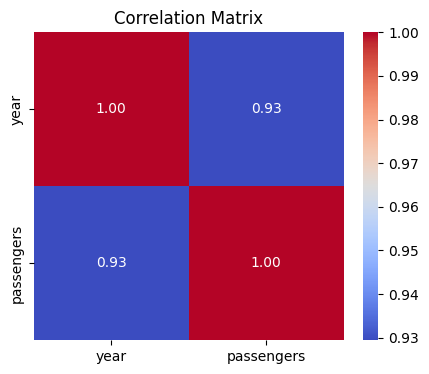

,year,passengers
year,1.000000,0.929408
passengers,0.929408,1.000000


In [22]:
corr_matrix = df_reduced.corr(numeric_only=True)
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

display(corr_matrix)

## Summary:

### Data Analysis Key Findings

*   The 'flights' dataset was successfully loaded, containing 'year', 'month', and 'passengers' data.
*   Visualizations showed an upward trend in passengers over the years (scatter plot) and a distribution of passengers (histogram).
*   No missing values were found in the original 'flights' dataset.
*   No outliers were detected in the 'passengers' column using the IQR method on the original data.
*   The dataset was reduced by sampling 70% of the data and dropping the 'month' column.
*   The 'passengers' column was scaled using MinMaxScaler.
*   The scaled 'passengers' column was discretized into 'Low', 'Medium', and 'High' categories.
*   After preprocessing, the reduced dataset contained 101 entries with 'year' and scaled 'passengers', and a new 'passengers_category'. One missing value was introduced in 'passengers_category' during discretization, likely due to binning boundaries.
*   The mean scaled passenger value was 0.327, with a median of 0.277 and a standard deviation of 0.233.
*   A strong positive correlation (0.93) was found between 'year' and scaled 'passengers', indicating a clear increase in passenger numbers over the years.

### Insights or Next Steps

*   The strong positive correlation between year and passengers suggests a clear growth trend in air travel over the analyzed period.
*   Investigate the single missing value in the 'passengers\_category' column after discretization to understand its origin and decide on handling it (e.g., imputation or removal).
